# 📱 Smartphone Specification Analysis - EDA Report

## Introduction

This project explores a dataset of **960 smartphones** containing **23 features**. 
The goal is to understand how different smartphone specifications affect their **price**.

Through this Exploratory Data Analysis (EDA), we aim to identify key patterns 
and relationships between features like processor speed, RAM, and display quality with pricing trends. 
The analysis is divided into two parts:  
1. **1D EDA** - to study the distribution of each feature individually, and  
2. **2D EDA** - to explore how different specifications relate to the price.  

By the end of this study, we expect to gain useful insights into which factors contribute most 
to a smartphone’s cost.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('../dataProcessing/smartphones.csv')

## 1. Dataset Overview

| Column | Type | Description |
|---------|------|-------------|
| brand | object | Smartphone brand |
| model | object | Model name |
| price | int64 | Price (₹) |
| rating | int64 | User rating |
| has_5G | bool | 5G connectivity available |
| has_NFC | bool | NFC support |
| has_IR_Blaster | bool | IR Blaster availability |
| processor_name | object | Processor name |
| processor_cores | float64 | No. of processor cores |
| processor_speed | float64 | Clock speed (GHz) |
| ram | float64 | RAM (GB) |
| internal_memory | float64 | Storage (GB) |
| battery_mah | int64 | Battery capacity (mAh) |
| fast_charging | float64 | Fast charging (W) |
| screen_size | float64 | Screen size (inches) |
| ppi | int64 | Pixel density (PPI) |
| refresh_rate | float64 | Screen refresh rate (Hz) |
| dual_display | bool | Dual display presence |
| num_rear_cameras | int64 | Number of cameras |
| rear_camera | float64 | Rear camera resolution (MP) |
| front_camera | float64 | Front camera resolution (MP) |
| card_support | bool | SD card supported |
| os | object | Operating system |


In [3]:
df.head()

,brand,model,price,rating,has_5G,has_NFC,has_IR_Blaster,processor_name,processor_cores,processor_speed,...,fast_charging,screen_size,ppi,refresh_rate,dual_display,num_rear_cameras,rear_camera,front_camera,card_support,os
0,oppo,Oppo F31 Pro 5G,26999,81,True,False,False,dimensity,8.0,2.50,...,80.0,6.57,397,120.0,False,2,50.0,32.0,False,android
1,oppo,Oppo F31 Pro Plus 5G,32999,82,True,False,False,snapdragon,8.0,2.63,...,80.0,6.80,453,120.0,False,2,50.0,32.0,False,android
2,apple,Apple iPhone 17,82900,78,True,True,False,bionic,6.0,NaN,...,40.0,6.30,458,120.0,False,2,48.0,18.0,False,android
3,samsung,Samsung Galaxy S24 FE 5G,34499,84,True,True,False,exynos,10.0,3.11,...,25.0,6.70,385,120.0,False,3,50.0,10.0,False,android
4,motorola,Motorola Moto G86 Power 5G,17494,83,True,False,False,dimensity,8.0,2.60,...,33.0,6.70,444,120.0,False,2,50.0,32.0,True,android


### 1. Brand Distribution

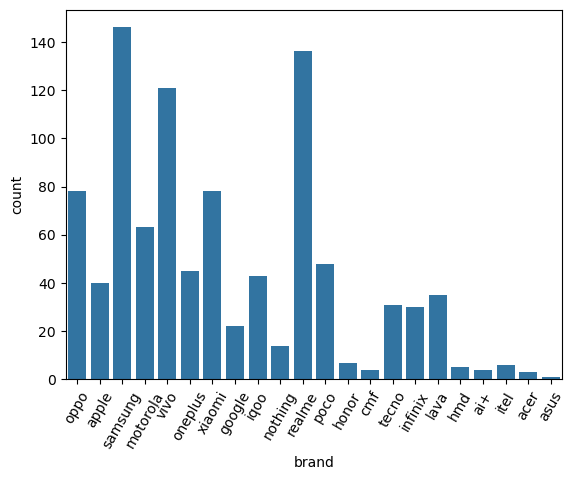

In [4]:
sns.countplot(data=df, x='brand')
plt.xticks(rotation=60)
plt.show()

**Insight:**  
From the chart, we can see that brands like *Samsung*, *Vivo*, and *Realme* have the highest number of models in the dataset, indicating they have a strong presence in the mid-range segment.  
Brands like *Apple* and *OnePlus* have fewer models but are typically positioned in the higher price range.


### 2. Operating System Distribution

<Axes: >

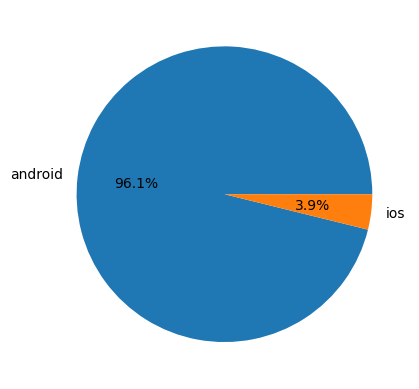

In [5]:
df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%',ylabel='')

**Insight:**  
The dataset is heavily dominated by **Android smartphones (around 96%)**, while **iOS devices account for only about 4%**.  
This suggests that most models in the dataset belong to Android-based brands, which reflects the general global market trend where Android holds a larger share, especially in the mid-range and budget categories.


### 3. Processor Type Distribution

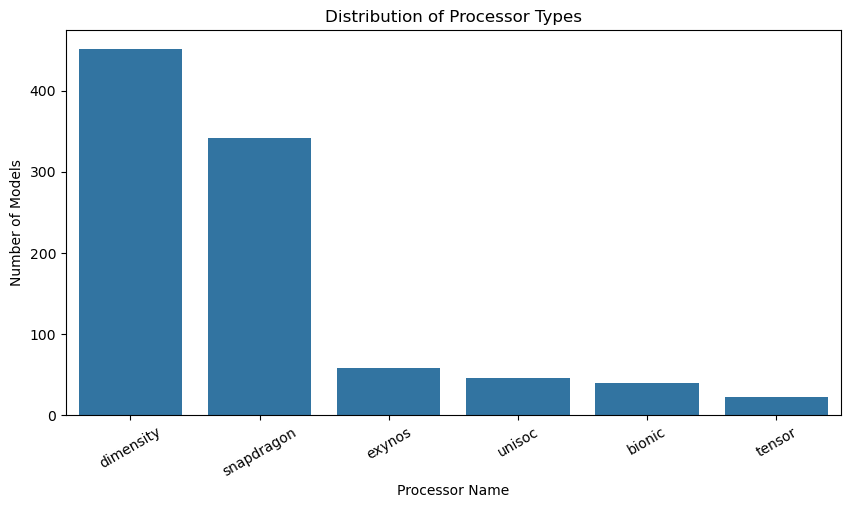

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='processor_name', data=df, order=df['processor_name'].value_counts().index)
plt.xticks(rotation=30)
plt.title('Distribution of Processor Types')
plt.xlabel('Processor Name')
plt.ylabel('Number of Models')
plt.show()

**Insight:**  
The chart shows that **MediaTek Dimensity** and **Qualcomm Snapdragon** processors are used in most smartphones, making up more than half of all models in the dataset.  

In contrast, processors like **Exynos**, **Apple’s Bionic**, **Tensor**, and **Unisoc** are found in far fewer devices.  
This indicates that the majority of Android phones rely on Dimensity and Snapdragon chipsets, while **Bionic** processors are exclusive to **Apple iPhones**.


### 4. 5G Connectivity


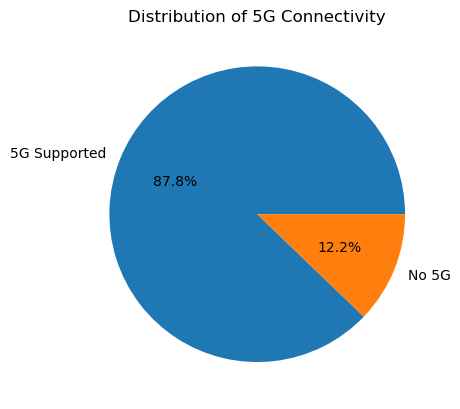

In [7]:
df['has_5G'].value_counts().plot(kind='pie', autopct='%0.1f%%', labels=['5G Supported','No 5G'])
plt.title('Distribution of 5G Connectivity')
plt.ylabel('')
plt.show()

**Insight:**  
Most smartphones in the dataset - around **88%** - come with **5G support**, showing that 5G has become a standard feature in modern devices.  
Only about **12%** of models lack 5G, which are likely older or entry-level phones still focused on 4G connectivity.

### 5. NFC Support

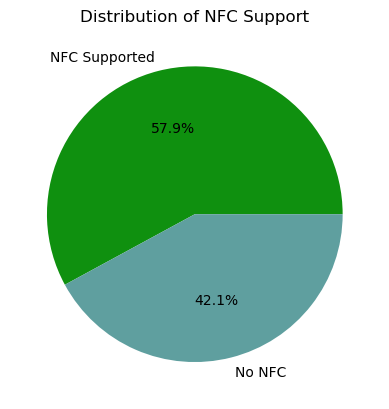

In [8]:
df['has_NFC'].value_counts().plot(kind='pie',autopct='%0.1f%%',colors=['#0f900f', '#5f9f9f'], labels=['NFC Supported', 'No NFC'])
plt.title('Distribution of NFC Support')
plt.ylabel('')
plt.show()

**Insight:**  
Around **60%** of smartphones in the dataset come with **NFC support**,  
indicating that more than half of modern phones now include this feature.  
However, a significant portion still lacks NFC, suggesting that it’s more common in mid-range and premium devices than in entry-level models.


### 6. IR Blaster Availability

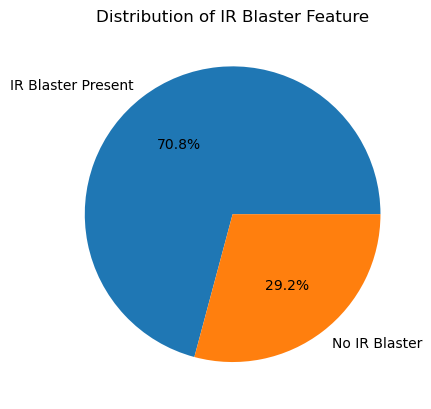

In [9]:
df['has_IR_Blaster'].value_counts().plot( kind='pie',autopct='%0.1f%%',labels=['IR Blaster Present', 'No IR Blaster'])
plt.title('Distribution of IR Blaster Feature')
plt.ylabel('')
plt.show()

**Insight:**  
Around **70%** of smartphones in the dataset include an **IR Blaster**,  
a feature that’s especially popular among **Chinese smartphone brands** such as **Xiaomi, Poco, and Redmi**.  

In contrast, most non-Chinese brands, especially from the U.S. and South Korea, tend to skip this feature.  
This suggests that IR Blasters are targeted toward markets where multifunctional hardware features are more appreciated.


### 7. Fast Charging Support and Capacity

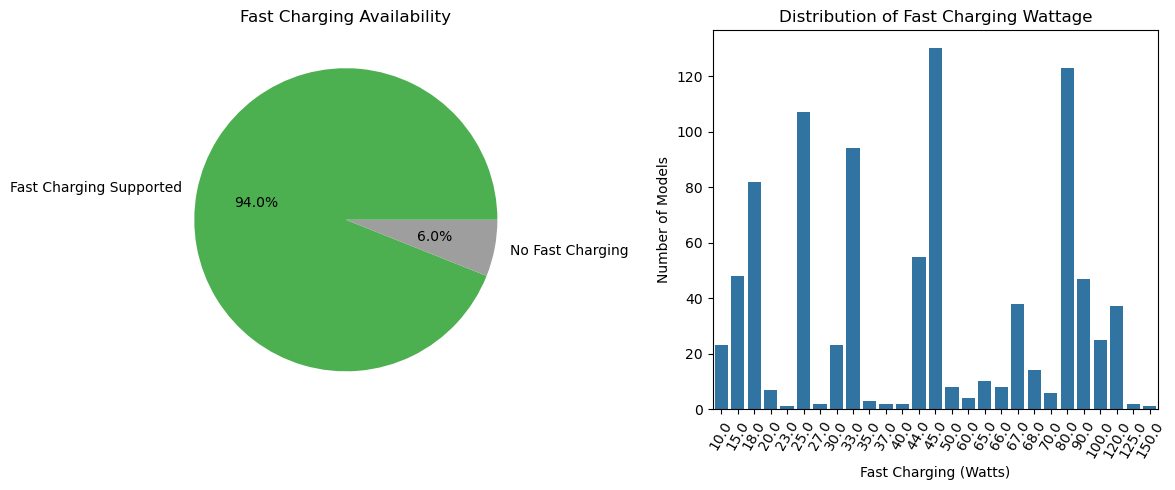

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
df['fast_charging'].notna().value_counts().plot(
    kind='pie',
    autopct='%0.1f%%',
    colors=['#4CAF50', '#9E9E9E'],
    labels=['Fast Charging Supported', 'No Fast Charging']
)
plt.title('Fast Charging Availability')
plt.ylabel('')

plt.subplot(1, 2, 2)
sns.countplot(x='fast_charging', data=df)
plt.title('Distribution of Fast Charging Wattage')
plt.xlabel('Fast Charging (Watts)')
plt.ylabel('Number of Models')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

**Insight:**  
From the charts, it’s clear that **most smartphones in the dataset include fast charging support**,  
showing how it has become a standard feature across modern devices.  

Among the supported models:  
- **18W** charging is the most common, seen in around **80+ phones**,  
- **25W** and **33W** charging speeds appear in **100+ models**, making them the dominant mid-range standards,  
- **15W, 44W, 67W, and 90W** are available in about **40+ models** each, mostly in upper mid-range devices,  
- **45W and 80W** fast charging options are seen in roughly **120+ high-end models**.  

### 8. Dual Display Availability

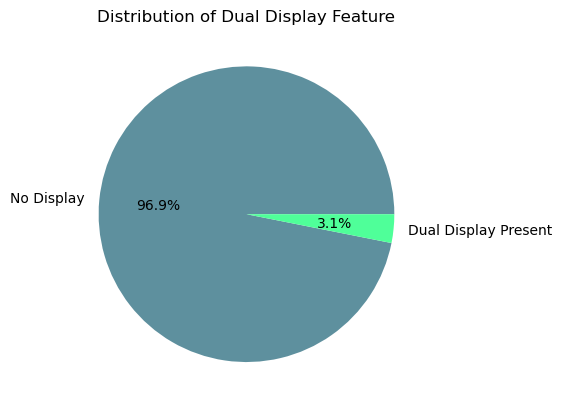

In [11]:
df['dual_display'].value_counts().plot(
    kind='pie',
    autopct='%0.1f%%',
    colors=['#5e909e', '#4fff99'],
    labels=['No Display', 'Dual Display Present']
)
plt.title('Distribution of Dual Display Feature')
plt.ylabel('')
plt.show()

**Insight:**  
Only about **3.1%** of smartphones in the dataset include a **dual display**,  
making it one of the rarest hardware features observed.  

This feature is mostly seen in **premium or experimental devices**, such as foldable phones or models designed for multitasking.  
Its low adoption rate suggests that while innovative, **dual-display technology** is still a **niche market trend**.


### 9. Expandable Storage (Card Support)

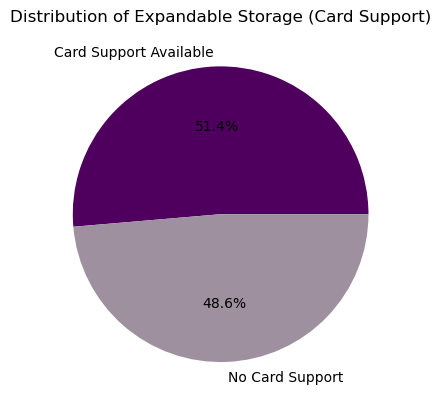

In [12]:
df['card_support'].value_counts().plot(
    kind='pie',
    autopct='%0.1f%%',
    colors=['#4f005f', '#9E909E'],
    labels=['Card Support Available', 'No Card Support']
)
plt.title('Distribution of Expandable Storage (Card Support)')
plt.ylabel('')
plt.show()

**Insight:**  
Around **48.6%** of smartphones in the dataset offer **card support**,  
while the remaining **51.4%** do not include expandable storage.  

This near-even split reflects the industry trend —  
**mid-range and budget phones** often continue to provide SD card slots for flexibility,  
whereas **premium and flagship models** tend to rely solely on **internal storage**.  

The shift away from expandable storage suggests a focus on faster built-in memory  
and cloud-based storage options in higher-end devices.

### 10. Price Distribution

Text(0.5, 1.0, 'Price Distribution (Boxplot)')

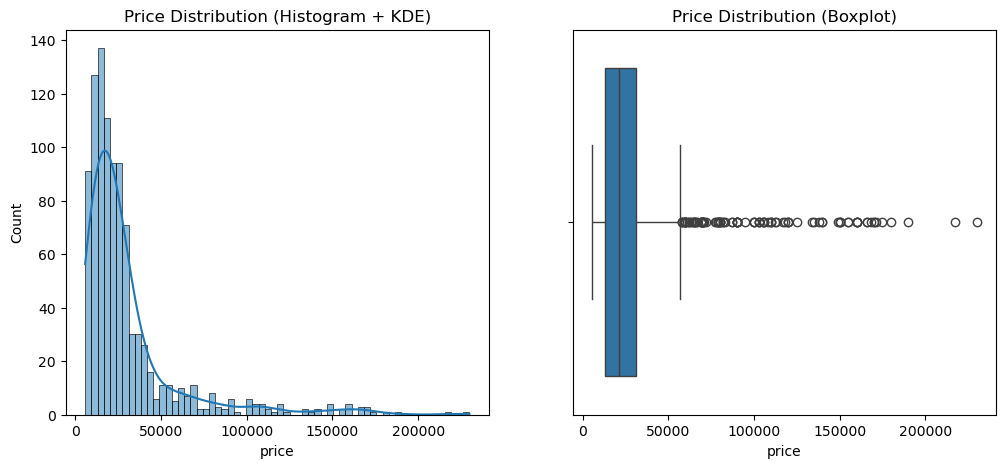

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x='price', kde=True, ax=axes[0])
axes[0].set_title('Price Distribution (Histogram + KDE)')

sns.boxplot(data=df, x='price', ax=axes[1])
axes[1].set_title('Price Distribution (Boxplot)')

In [14]:
df['price'].skew()

np.float64(3.008580013873305)

**Insight:**  
The distribution of smartphone prices is **highly right-skewed** (skewness ≈ 3.0).  
This means that most phones in the dataset fall in the **lower to mid-price range**,  
while a smaller number of **premium phones** are priced significantly higher.  

The **boxplot** also highlights several **outliers**, which likely correspond  
to high-end flagships from brands like Apple, Samsung, or OnePlus.  
Overall, this shows that the market is dominated by **affordable smartphones**,  
with fewer devices positioned in the luxury segment.


### 11. Rating Distribution

Text(0.5, 1.0, 'Rating Distribution (Boxplot)')

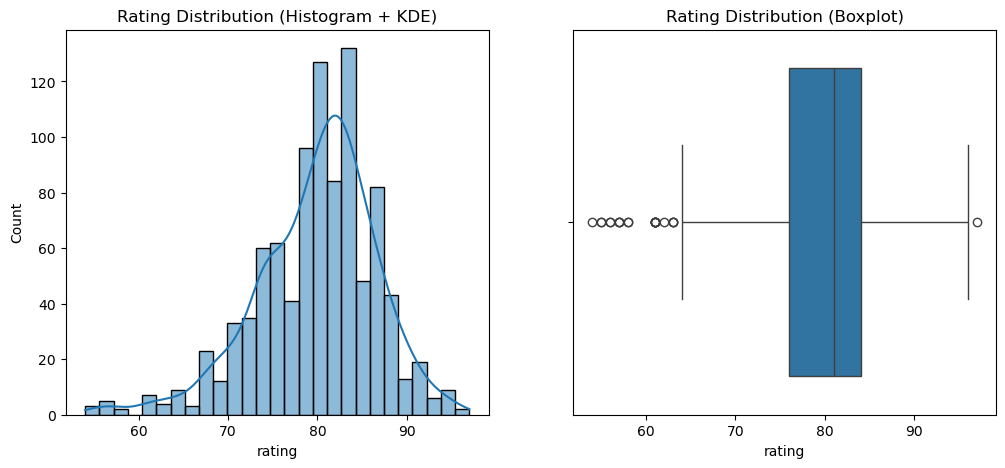

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x='rating', kde=True, ax=axes[0])
axes[0].set_title('Rating Distribution (Histogram + KDE)')

sns.boxplot(data=df, x='rating', ax=axes[1])
axes[1].set_title('Rating Distribution (Boxplot)')

**Insight:**  
Most smartphone ratings fall between **75 and 90**, with the highest concentration around **80–85**.  
This means that, overall, users tend to be **fairly satisfied** with the phones in the dataset.  
There are a few **lower-rated phones** as well, but they are in the minority.  
The distribution is slightly **skewed to the left**, indicating that **high ratings are more common**.


### 12. Processor Cores Distribution

<Axes: xlabel='processor_cores', ylabel='count'>

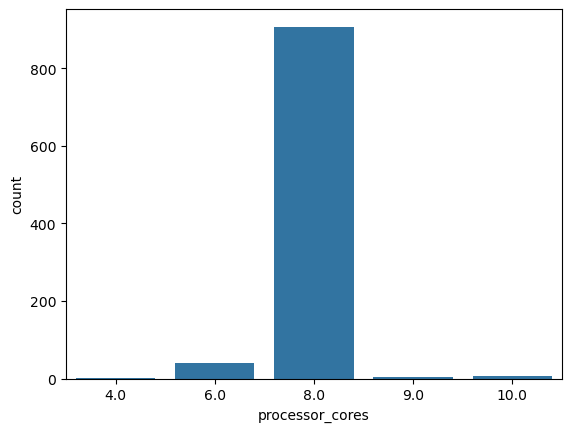

In [16]:
sns.countplot(data=df,x='processor_cores')

**Insight:**  
Most smartphones in the dataset come with **8-core processors**, which has become the standard for modern devices.  
A smaller number use **6-core** or **10-core** CPUs, and **4-core** or **9-core** processors are very rare.  
This shows that the market has largely moved toward **octa-core processors** as the default configuration.


### 13. Processor Speed Distribution

<Axes: xlabel='processor_speed', ylabel='Count'>

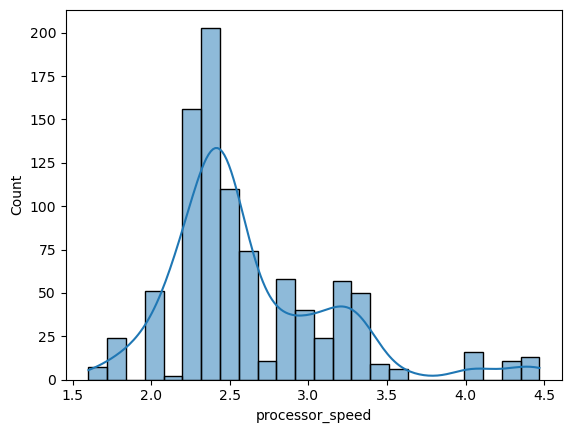

In [17]:
sns.histplot(df['processor_speed'], kde=True)

**Insight:**  
Most phones have a processor speed between **2.0 GHz and 3.0 GHz**, with the highest concentration around **2.2–2.6 GHz**.  
A smaller number of phones reach **3.2 GHz or higher**, and these are typically **mid-range to flagship devices**.  
So, while higher clock speeds do exist, **2–3 GHz is the standard performance range** for most smartphones in the dataset.


### 14. Ram Distribution

<Axes: xlabel='ram', ylabel='count'>

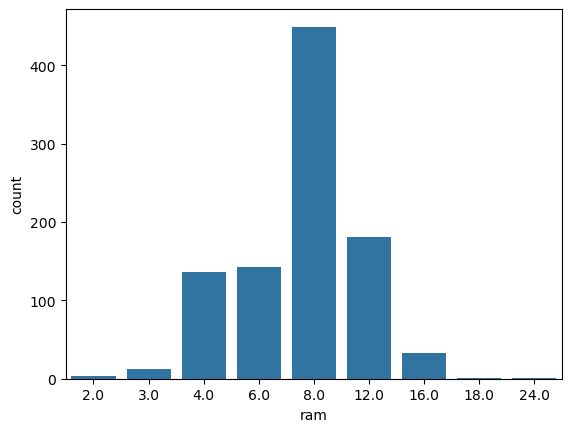

In [18]:
sns.countplot(x='ram', data=df)

**Insight:**  
Most smartphones in the dataset come with **8GB of RAM**, making it the most common configuration.  
We also see a good number of devices with **6GB** and **12GB** RAM, which fall into mid-range and upper mid-range categories.  
Lower RAM options like **2GB–4GB** are less common and typically belong to budget phones,  
while **16GB+** RAM is rare and mostly seen in flagship models.


**Insight:**  
Around **94%** of the phones in the dataset have a **specified fast-charging wattage**,  
while only about **6%** have this information missing.  
This means fast charging has become a **common standard feature** and is widely advertised by manufacturers.


### 15. Internal Memory Distribution

<Axes: xlabel='internal_memory', ylabel='count'>

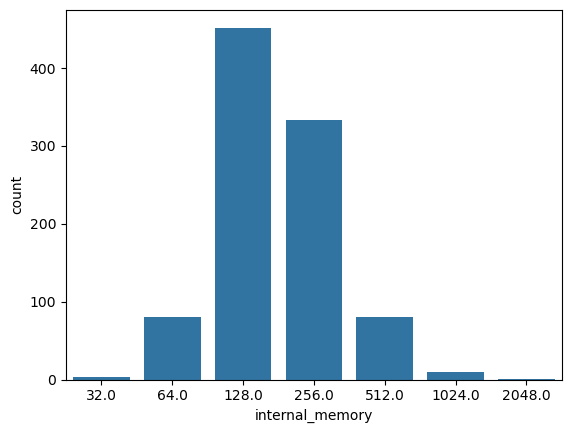

In [20]:
sns.countplot(x='internal_memory', data=df)

**Insight:**  
The most common internal storage options in smartphones are **128GB** and **256GB**,  
showing that these have become the standard choices for most users.  
Lower capacities like **32GB and 64GB** are less common and generally appear in budget models,  
while larger options like **512GB, 1TB, or even 2TB** are rare and usually found in **high-end flagship phones**.


### 16. Refresh Rate Distribution

<Axes: ylabel='count'>

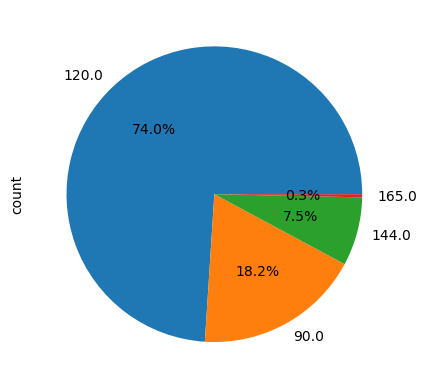

In [21]:
df['refresh_rate'].value_counts().plot(kind='pie',autopct='%0.1f%%')

**Insight:**  
Most smartphones in the dataset come with a **120Hz refresh rate** (around **74%**),  
making it the most common display standard for smooth scrolling and gaming.  
About **18%** of phones still use **90Hz**, which is popular in mid-range models.  
Higher refresh rates like **144Hz** and **165Hz** are **very rare** and are usually found in **gaming-oriented or flagship phones**.


### 17. Pixels Per Inch Distribution

<Axes: xlabel='ppi', ylabel='Count'>

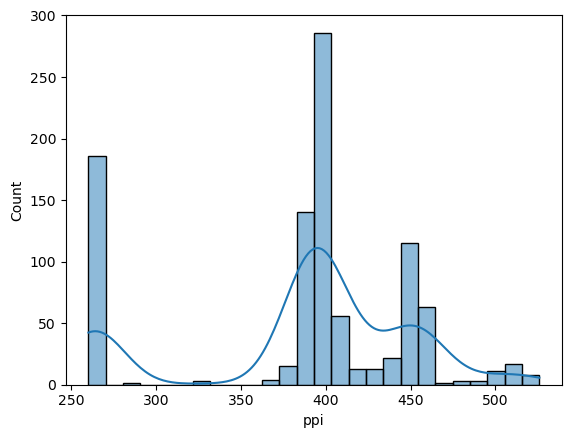

In [22]:
sns.histplot(df['ppi'], kde=True)

**Insight:**  
Most smartphones have a screen pixel density between **380 and 450 PPI**, which is considered sharp and comfortable for everyday use.  
A small number of phones with **250–300 PPI** appear in the budget segment, while **very high-density displays (450+ PPI)** are mostly found in **flagship models**.  
So, higher PPI generally appears in **premium devices**, but the majority of phones stay around the **400 PPI** range.


### 18. Rear Camera Distribution

<Axes: xlabel='rear_camera', ylabel='Count'>

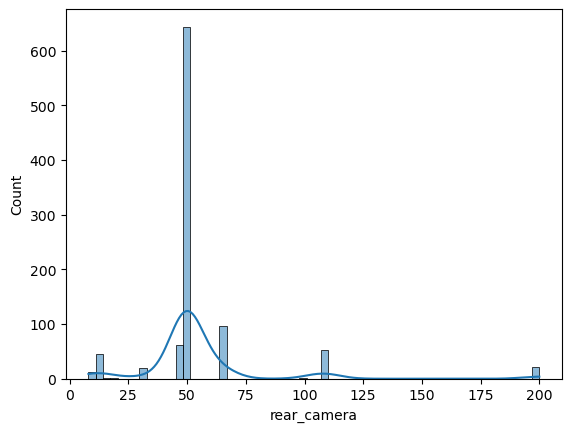

In [23]:
sns.histplot(df['rear_camera'], kde=True)

**Insight:**  
Rear camera resolutions are mostly concentrated around **48MP and 64MP**, which are now the standard options in modern smartphones.  
There are a smaller number of phones with **12MP, 16MP, and 32MP** sensors (usually older or budget models),  
and only a few models offer **108MP or 200MP** cameras, which are typically **premium flagships**.  
So while **higher megapixels are available**, the **48MP–64MP range dominates the market**.


### 19. Front Camera Distribution

<Axes: xlabel='front_camera', ylabel='Count'>

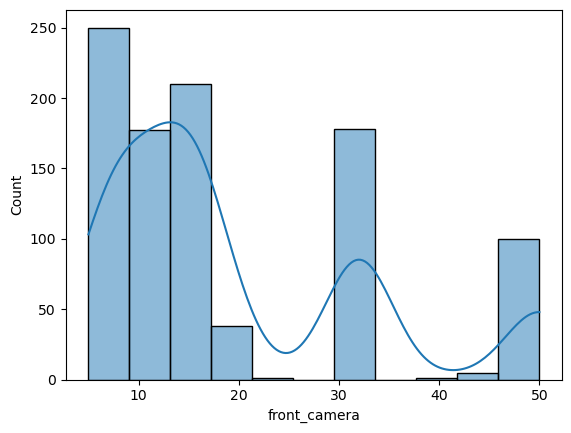

In [24]:
sns.histplot(df['front_camera'], kde=True)

**Insight:**  
Front camera resolutions are mostly grouped around **8MP**, **13MP**, and **16MP**, which are common in everyday smartphones.  
We also see some models offering **32MP** and **50MP** selfie cameras, but these are more common in **mid-range and premium** devices.  
Overall, while higher megapixel selfie cameras do exist, **most phones still stay in the 8–16MP range**, suggesting that manufacturers prioritize rear cameras more than front ones.


**Insight:**  
The distribution of expandable storage support is almost evenly split.  
Around **48%** of phones offer **card support**, while about **51%** do not.  
This suggests that many brands, especially in the **mid-range and premium** segment,  
are shifting toward **fixed internal storage** and removing the memory card slot.


### 20. Number of Rear Cameras

<Axes: ylabel='count'>

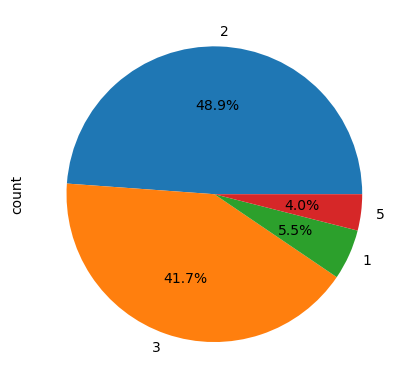

In [26]:
df['num_rear_cameras'].value_counts().plot(kind='pie',autopct='%0.1f%%')

**Insight:**  
Most smartphones come with either **2** or **3** rear cameras, making up the majority of devices in the dataset.  
Phones with **1** rear camera are now quite uncommon and are generally found in **budget models**.  
Meanwhile, models with **5 cameras** are rare and usually belong to **premium or experimental designs**.  
This shows that **2–3 camera setups have become the standard** in modern smartphones.


# Conclusion (1D EDA)

From the 1D exploratory analysis, we can see that smartphone specifications follow some clear market standards. Most devices in this dataset come with **8GB RAM** and **128GB or 256GB internal storage**, indicating that this has become the typical configuration for modern mid-range phones. Similarly, **4500–5000 mAh** batteries are the most common, showing that manufacturers generally aim for all-day battery life.

On the camera side, **48MP and 64MP** rear cameras appear most frequently, while front cameras typically fall between **8MP and 16MP**. Higher megapixel sensors do exist (such as 108MP or 200MP rear cameras and 32MP or 50MP front cameras), but they are mainly found in more premium models. For displays, **120Hz refresh rate** and **around 400 PPI** pixel density are dominant, suggesting that smooth screens and sharp resolution have become standard expectations.

Overall, the 1D EDA shows that today’s smartphone market has **moved toward a uniform feature baseline**, where the majority of devices share similar memory, battery, display, and camera specifications. Differences mostly start to appear in processor performance and premium add-on features, which will be further analyzed in the 2D EDA.
